# Prima esercitazione: generazione di numeri casuali

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

## Stima di un semplice integrale ed errore associato

Per testare il generatore di numeri casuali, facciamo una stima dell'integrale
\begin{eqnarray}\langle r \rangle = \int_0^1 r dr = 0.5.\end{eqnarray}
La stima è fatta generando $10^6$ numeri casuali distribuiti uniformemente tra $0$ e $1$, che vengono raggruppati in $N=100$ blocchi da $100$ misure ciascuno.
Ciascun blocco si può considerare un esperimento.

Supponiamo che esperimenti successivi siano tra loro scorrelati. Per le misure ottenute in esperimenti successivi vale la legge dei grandi numeri, perciò all'aumentare del numero di esperimenti fatti è possibile ridurre l'incertezza sulla misura. Infatti questo si osserva nell'andamento di $\langle r\rangle$ e della sua incertezza all'aumentare del numero di blocchi usati per la misura, dal momento che 

\begin{eqnarray}
\sigma\propto\frac{1}{\sqrt{N}}\end{eqnarray}

Nel seguente grafico è riportata la misura di
\begin{eqnarray}
\langle r\rangle -0.5
\end{eqnarray}

in funzione del numero di esperimenti fatti.

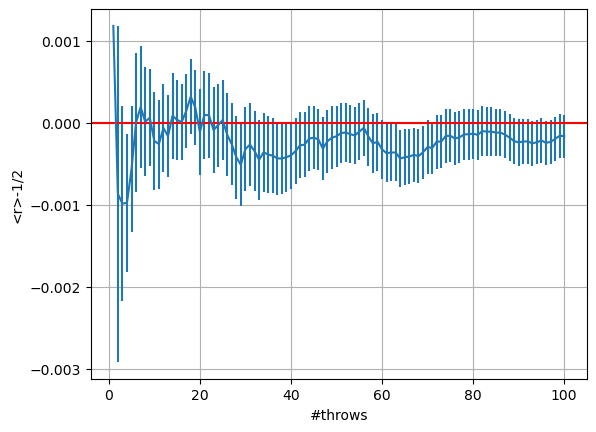

In [33]:
sum_prog,err_prog = np.loadtxt(fname = "risultati/rMedia.txt",usecols=(0, 1), unpack=True)

N = 100
x = np.arange(N)+1

plt.errorbar(x,sum_prog-1/2,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel('<r>-1/2')
plt.axhline(y=0, color = 'r', linestyle = '-')
plt.grid(True)
plt.show()

In [34]:
sum_prog.size, err_prog.size

(100, 100)

Otteniamo all'ultimo passo 
\begin{eqnarray}
\langle r\rangle-0.5=7.2\cdot 10^{-4},
\end{eqnarray}
che è pienamente compatibile con l'errore associato $\sigma_{\langle r\rangle}=8.65\cdot 10^{-4}$.

Stimiamo ora l'errore associato alla misura di $\langle r\rangle$. Per fare ciò, misuriamo la deviazione standard di $r$ dal suo valor medio.
\begin{eqnarray}
\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12\end{eqnarray}
Per questa quantità vale lo stesso discorso fatto sopra.

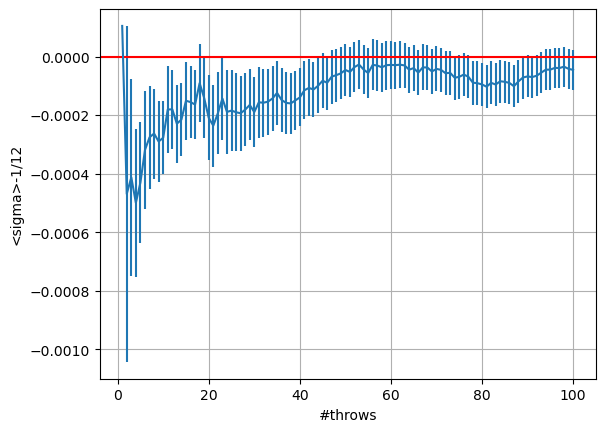

In [35]:
sum_prog,err_prog = np.loadtxt(fname = "risultati/rErrore.txt",usecols=(0, 1), unpack=True)

plt.errorbar(x,sum_prog-1/12,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel('<sigma>-1/12')
plt.axhline(y=0, color = 'r', linestyle = '-')
plt.grid(True)
plt.show()

Otteniamo all'ultimo passo 
\begin{eqnarray}
\sigma^2-1/12=1.88\cdot 10^{-4},
\end{eqnarray}
che è pienamente compatibile con l'errore associato $\sigma_{\sigma^2}=2.33\cdot 10^{-4}$.

## Test di Pearson

Durante tutto il corso supporremo di usare numeri casuali distribuiti in modo uniforme. In realtà questi numeri sono pseudo-casuali, dato che in verità sono generati tramite un algoritmo deterministico, e quindi riproducibile. Tuttavia questo algoritmo è altamente sensibile alle condizioni iniziali. Per questo, dal nostro punto di vista i numeri così generati sono altamente scorrelati tra di loro, quindi a tutti gli effetti casuali.

Il test di Pearson permette di stimare la probabilità che i numeri generati siano distribuiti in modo uniforme.

Ho diviso l'intervallo $[0,1]$ in $M=100$ parti uguali e in ogni sottointervallo ho calcolato $n=10^3$ valori di $\chi^2$ secondo la formula

\begin{eqnarray}
\chi^2 &=& \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}\\
&=&\frac{1}{10}\sum_{i=1}^{100} ( n_i - 10 )^2
\end{eqnarray}

Il valore atteso per $\chi^2$ è il numero $M$ di gradi di libertà,
$$\langle\chi^2\rangle=M=100$$
e la varianza è $\sigma^2=2M$, pertanto
$$\sigma=\sqrt{2M}=\sqrt{200}=14.1$$

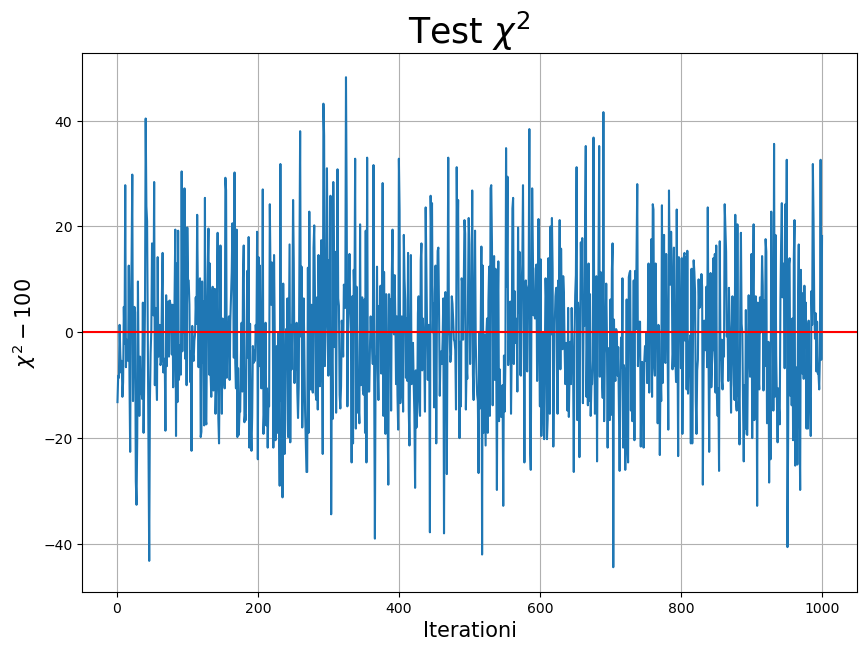

Chi^2 medio (atteso 100): 
99.25859999999999

Errore statistico (atteso 14.1): 
14.438935072920026


In [15]:
N = 1000
plt.figure(figsize=(10,7))
x = np.arange(N)+1 
chi = np.loadtxt("risultati/chiQuadro.txt", usecols=(0), unpack='true')
plt.plot(x, chi-100)
plt.xlabel('Iterationi', fontsize = 15)
plt.ylabel('$\chi^2-100$', fontsize = 15)
plt.title("Test $\chi ^2$", fontsize =25)
plt.grid(True)
plt.axhline(y=0, color = 'r', linestyle = '-')

plt.show()

print('Chi^2 medio (atteso 100): ')
print(np.mean(chi))
print('\nErrore statistico (atteso 14.1): ')
print(np.std(chi))

I valori di $\chi^2$ sono riportati nel seguente istogramma:

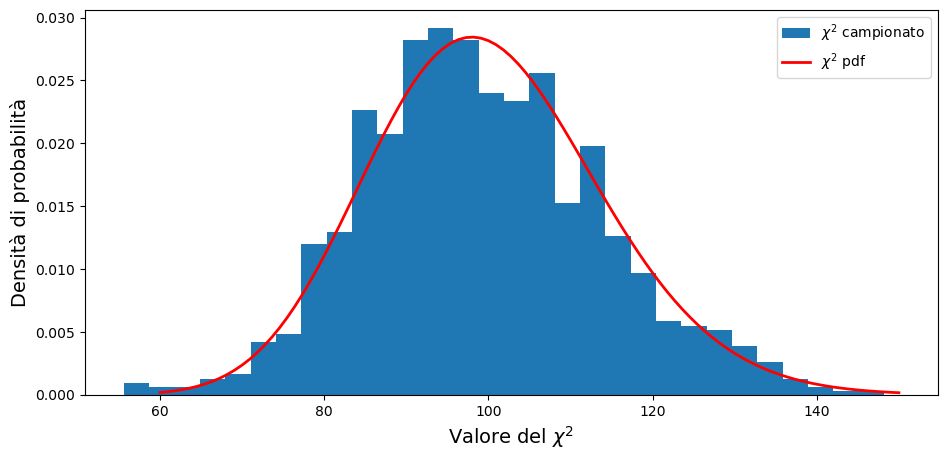

In [16]:
from scipy.stats import chi2

ChiVect=np.loadtxt("risultati/chiQuadro.txt")

plt.figure(figsize=(11,5))
x = np.linspace(60,150,100)

matplotlib.pyplot.hist(ChiVect,bins=30,density=True, label= "$\chi^2$ campionato")
plt.plot(x, chi2.pdf(x, 100), 'r-', lw=2, label='$\chi^2$ pdf')

plt.xlabel("Valore del $\chi^2$", fontsize=14)
plt.ylabel('Densità di probabilità', fontsize=14)

plt.legend()


# Altre distribuzioni di probabilità

Vogliamo ora ampliare le funzionalità del generatore di numeri pseudo-casuali e confermare la validità del teorema centrale del limite. Secondo questo teorema, quando le variabili casuali vengono mediamente estratte insieme, le medie tendono a distribuirsi come una gaussiana centrata sul valore vero, indipendentemente dalla distribuzione da cui sono estratte, a condizione che la distribuzione abbia una varianza finita.

In altre parole, se estraiamo una variabile casuale con una distribuzione, ad esempio esponenziale, e costruiamo direttamente l'istogramma delle estrazioni, otteniamo una distribuzione esponenziale. Tuttavia, se estraiamo le variabili a gruppi e ne calcoliamo la media per ciascun gruppo, man mano che la dimensione del gruppo aumenta, la distribuzione delle medie converge a una distribuzione gaussiana.

Per raggiungere questo obiettivo, ho esteso la classe Random per consentire l'estrazione di numeri con diverse distribuzioni di probabilità:

1. $p(x)=\lambda e^{-\lambda x}$, esponenziale

2. $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, lorenziana

Ho implementato il metodo dell'inversione della Cumulative Distribution Function (CDF) per generare variabili casuali secondo queste distribuzioni. L'inversione della CDF può essere risolta analiticamente e ciò ci permette di ottenere le seguenti relazioni:

1. $x=-\frac{1}{\lambda} \ln(1 - u)$: $x$ è distribuito esponenzialmente se $y$ ha distribuzione uniforme in $[0,1]$

2. $x = \mu + \Gamma \tan(\pi(u - 0.5))$: $x$ è distribuito secondo una lorenziana se $y$ ha distribuzione uniforme in $[0,1]$

dove $u$ è un numero estratto uniformemente tra 0 e 1.

Per verificare graficamente i risultati, riempiamo 4 istogrammi per ciascuna delle 3 distribuzioni. Ogni istogramma raccoglie un certo numero di realizzazioni estratte secondo la relativa distribuzione.

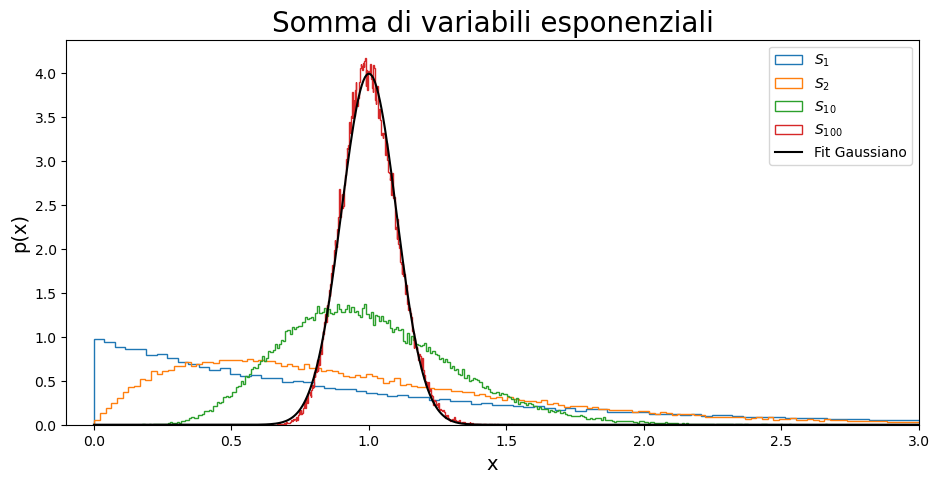

In [28]:
from scipy.stats import norm  

index = ["1","2","10","100"]

x = np.linspace(0.,3,500)

plt.figure(figsize=(11,5))

for i in range (0,4):
    LCTexp = np.loadtxt("risultati/outfileLCTexp"+index[i]+".txt")
    matplotlib.pyplot.hist(LCTexp,bins=350, label="$S_{"+index[i]+"}$", density=True, histtype='step')

plt.plot(x, norm.pdf(x, 1, 1/10), 'black', lw=1.5, label='Fit Gaussiano',)

plt.title("Somma di variabili esponenziali", fontsize=20)
plt.xlabel("x", fontsize=14)
plt.ylabel('p(x)', fontsize=14) 
plt.xlim(-0.1,3)

plt.legend()   
plt.show()  


Dal grafico è evidente che all'aumentare del numero di variabili sommate, le distribuzioni diventano sempre più simmetriche. Per dimostrare la validità Teorema Centrale del Limite, ho disegnato il fit gaussiano nel caso di maggiore somiglianza tra le distribuzioni. Ricordo che questa è un'approssimazione del teorema, dato che la somma delle variabili casuali ha un numero finito di termini.

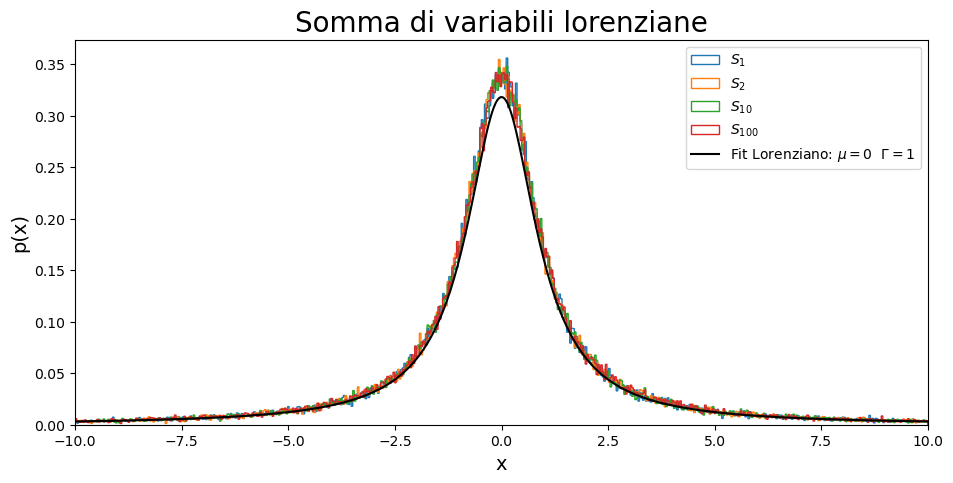

In [30]:
from scipy.stats import cauchy

index = ["1","2","10","100"]
x = np.linspace(-10,10,500)

plt.figure(figsize=(11,5))

for i in range (0,4):
    LCTexp = np.loadtxt("risultati/outfileLCTlor"+index[i]+".txt")
    matplotlib.pyplot.hist(LCTexp,range = (-10,+10),bins=550, label="$S_{"+index[i]+"}$", density=True, histtype='step')

y = cauchy.pdf(x,0,1)
plt.plot(x, y, color = 'black', linestyle = '-', label = "Fit Lorenziano: $\mu=0$  $\Gamma=1$")

plt.title("Somma di variabili lorenziane", fontsize=20)
plt.xlabel("x", fontsize=14)
plt.ylabel('p(x)', fontsize=14) 
plt.xlim(-10,10)

plt.legend()   
plt.show()  

Dato che la distribuzione di Lorentz ha una varianza non finita, il Teorema Centrale del Limite stabilisce che la distribuzione risultante sarà ancora una Lorenziana. Poiché tutte le distribuzioni hanno le stesse proprietà (media nulla e varianza infinita), sono completamente sovrapponibili con una Lorenziana centrata nell'origine e con larghezza unitaria.

# Stima di $\pi$ con l'esperimento di Buffon


<div style="text-align:center;">
    <img src="https://mathworld.wolfram.com/images/eps-svg/BuffonNeedle_700.svg" alt="Image" style="display:inline-block;">
</div>


Georges-Louis Leclerc, conte di Buffon, nel 1977 stimò che la probabilità che un ago atterri su una riga è
\begin{eqnarray}
P=\frac{2L}{\pi d}
\end{eqnarray}
Successivamente Laplace nel 1820 suggerì che possiamo stimare $\pi$ misurando il rapporto tra il numero di aghi che atterra su una riga e il numero totale di aghi, tramite la formula 
\begin{eqnarray}
\pi=\frac{2L}{Pd}=\frac{2L}{d}\lim_{N_\text{lanci}\rightarrow\infty}\frac{N_\text{lanci}}{N_\text{colpiti}}
\end{eqnarray}


<div style="text-align:center;">
    <img src="https://mathworld.wolfram.com/images/eps-svg/BuffonNeedleTosses_825.svg" alt="Image" style="display:inline-block;">
</div>




## Eseguo la misura di $\pi$ 

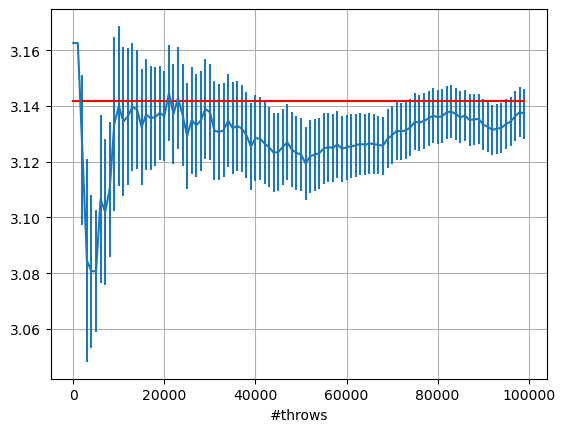

In [33]:
M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block (=experiment)
d = 1.2
l=1.

x = np.arange(N)      # [0,1,2,...,N-1]

x*=L                  # Number of throws = block * (Number of throws in each block)

sum_prog,err_prog = np.loadtxt(fname = "risultati/buffon.txt",unpack=True)

pigreco= (2./sum_prog)*(l/d)
errPi = err_prog *pigreco/sum_prog

pi_array = np.full(N, np.pi)

plt.errorbar(x,pigreco,yerr=errPi)
plt.xlabel('#throws')
plt.plot(x, pi_array, label='pi', color="red")
plt.grid(True)
plt.show()